In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('moved_games.csv')
display(games.head(3))
games.columns
games.info

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


<bound method DataFrame.info of                                 Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       

In [3]:
# Convert column names to snake case
games.columns = games.columns.str.lower().str.replace(' ', '_')
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# Convert the data to the required types.
print(games.dtypes)
# Convert 'year_of_release' to int. We will have to convert NaN values to 0
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

# Find rows missing ['year_of_release'] (== 0)
miss_year = games[games['year_of_release']==0]
display(miss_year)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
# Some of the games have the year of release in the last 4 digits of [name].
# Create a function to extract the last 4 digits from [name] and add it to [year_of_release]:
def extract_last_4_digits(row):
    # Use regular expression to extract the last 4 digits from the 'name' column
    last_4_digits = row['name'][-4:]
    
    # Check if the extracted value is a number, and update 'year_of_release'
    if last_4_digits.isdigit():
        row['year_of_release'] = int(last_4_digits)
    
    return row

# Apply the function to each row in the DataFrame
miss_year = miss_year.apply(extract_last_4_digits, axis=1)
display(miss_year)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,2008,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Slice the Dataframe to find how many missing values remain
has_year = miss_year[miss_year['year_of_release'] !=0]
miss_year = miss_year[miss_year['year_of_release'] ==0]
display(has_year)
display(miss_year)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,2005,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
5889,NBA Live 2003,GC,2003,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
8918,All-Star Baseball 2005,XB,2005,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
# Combine the 'has_year' df into 'games', 
games = has_year.combine_first(games)
display(games)
indices_has_year = [183,377,475,1650,3486,4775,5156,5655]
indices_miss_year = [456,609,627,657,678,16348,16405,16448]
display(games.iloc[indices_has_year])
display(games.iloc[indices_miss_year])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,2005,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M


In [8]:
# Create a function for the df that, if the ['year_of_release']==0, it replaces it with the median 'year of release' of its platform.
def replace_zero_year_with_median(df):
    platforms = df['platform'].unique()
    
    for platform in platforms:
        median_year = df[df['platform'] == platform]['year_of_release'].median()
        df.loc[(df['platform'] == platform) & (df['year_of_release'] == 0), 'year_of_release'] = median_year

replace_zero_year_with_median(games)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# Print the indices lists for the missing values and compare to check the function worked correctly:
display(games.iloc[indices_has_year])
display(games.iloc[indices_miss_year])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003.0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
3486,Madden NFL 2002,XB,2002.0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003.0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003.0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,2005.0,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,2009.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,1981.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,2010.0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,2009.0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
16348,Agarest Senki: Re-appearance,PS3,2011.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,2003.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,2009.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M


In [10]:
# Check for any missing values:
print("Missing values in ['year_of_release']:")
print(games['year_of_release'].isna().sum()) 
print(games[games['year_of_release']==0].count())
# Convert ['year_of_release'] column to Integer again:
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

Missing values in ['year_of_release']:
0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### **Explain why you filled in the missing values as you did or why you decided to leave them blank.**
### **Why do you think the values are missing? Give possible reasons.**
#### *In the case of ['year_of_release'] it might be due to a lack of documentation. We can find the missing values in all columns and decide how to replace them in every case.*

In [11]:
# Count missing values in all columns:
def missing_values_summary(df):
    # Loop through each column and print the missing values count
    for column in df.columns:
        missing_count = df[column].isna().sum()
        print(f"Missing values in ['{column}']: {missing_count}")

missing_values_summary(games)

Missing values in ['name']: 2
Missing values in ['platform']: 0
Missing values in ['year_of_release']: 0
Missing values in ['genre']: 2
Missing values in ['na_sales']: 0
Missing values in ['eu_sales']: 0
Missing values in ['jp_sales']: 0
Missing values in ['other_sales']: 0
Missing values in ['critic_score']: 8578
Missing values in ['user_score']: 6701
Missing values in ['rating']: 6766


In [12]:
# In ['genre'] and ['name'] we see there is 2 missing values.
# Locate them by sort_values(), since the NaN values are always at the
# tail of the df.
print(games['name'].sort_values().tail(5))
print(games['genre'].sort_values().tail(5))
# We can see in both cases that they share the same missing values: rows 659 and 14244
display(games.iloc[[659, 14244]])
# This is likely data that got corrupted. We can eliminate from the dataframe
indices_to_remove = [659, 14244]
# Use iloc to exclude specific rows and reset index
games = games.drop(games.index[indices_to_remove]).reset_index(drop=True)
display(games)

8280     uDraw Studio: Instant Artist
475        wwe Smackdown vs. Raw 2006
9134     ¡Shin Chan Flipa en colores!
659                               NaN
14244                             NaN
Name: name, dtype: object
14108    Strategy
15384    Strategy
11864    Strategy
659           NaN
14244         NaN
Name: genre, dtype: object


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Missing values in ['critic_score']:
print("Missing values in ['critic_score']:", games['critic_score'].isna().sum())
display(games['critic_score'].unique())
display(games['critic_score'].describe())
display(games['critic_score'].value_counts())
print("Median:", games['critic_score'].median())
display(games.sort_values(by='critic_score').tail(25))

Missing values in ['critic_score']: 8576


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

critic_score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64

Median: 71.0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16681,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16682,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16683,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16684,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16685,Neo Angelique Special,PSP,2008,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16686,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.0,NaN,tbd,T
16687,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16688,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16689,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16691,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.0,NaN,NaN,NaN


#### *It seems that games with a missing critic score had very low or no sales in all markets. It makes sense because unpopular games are usually not reviewed by many critics nor receive much press. To better handle this data we can assign to these games an average critic score of ~70. The critic scores are normally distributed (mean:68.96, median:71, most recurring value:70), so this won't affect the analysis.*

In [14]:
games['critic_score'] = games['critic_score'].fillna(70.0)
display(games[games['critic_score']==70])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,70.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,70.0,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,70.0,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,70.0,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,70.0,NaN,NaN


In [15]:
# Missing values in ['user_score']
print("Missing values in ['user_score']:", games['user_score'].isna().sum())
display(games['user_score'].unique())
display(games['user_score'].describe())
display(games['user_score'].value_counts())

Missing values in ['user_score']: 6699


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

#### *The most recurring value in 'user_score' is 'tbd' (to be determined). It seems that there isn't enought data about these values, either because there is noe enough user feedback or the data is still being collected. In any case, we can probably replace the 'tbd' values with the mean or median, given that the data is normally distributed. To find this, we can exclude the 'tbd' values and find these markers.*

In [16]:
# Marker values if we exclude the 'tbd' rows:
user_score_wo_tbd = games[games['user_score']!='tbd']
user_score_wo_tbd.loc[:,'user_score'] = user_score_wo_tbd['user_score'].astype(float)

display(user_score_wo_tbd['user_score'].unique())
display(user_score_wo_tbd['user_score'].describe())
print("Median:", user_score_wo_tbd['user_score'].median())
print("Mean:", user_score_wo_tbd['user_score'].mean())
display(user_score_wo_tbd['user_score'].value_counts())

array([8.0, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0, 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7.0, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0.0,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1.0, 9.7], dtype=object)

count     7590.0
unique      95.0
top          7.8
freq       324.0
Name: user_score, dtype: float64

Median: 7.5
Mean: 7.1250461133070315


user_score
7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: count, Length: 95, dtype: int64

#### *Similarly to the ['critic_score'] column, the values in 'user_score' seem to be very normally distributed. (mean:7.12, median:7.5, most recurring value:7.8). We can replace all 'tbd' and NaN values with the median and this won't affect any further analysis significantly.*

In [17]:
# On ['user_score']: Fill NaN values and replace 'tbd' values with median=7.5
games['user_score'] = games['user_score'].fillna(7.5).replace('tbd', 7.5)
# Convert column to Float after replacing values
games['user_score'] = games['user_score'].astype(float)
# Check if there are any remaining 'tbd' or 'nan' values.
display(games[games['user_score']==7.5])
display(games[games['user_score']=='tbd'])
display(games['user_score'].value_counts())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.5,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70.0,7.5,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,70.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,70.0,7.5,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,70.0,7.5,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,70.0,7.5,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,70.0,7.5,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


user_score
7.5    9374
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0.0       1
9.7       1
Name: count, Length: 95, dtype: int64

In [18]:
# Missing values in ['rating']:
print("Missing values in ['rating']:", games['rating'].isna().sum())
display(games['rating'].unique())
display(games['rating'].describe())
display(games['rating'].value_counts())
display(games.sort_values(by='rating').tail(25))

Missing values in ['rating']: 6764


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16678,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16680,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16681,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16682,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16683,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16684,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008,Racing,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16685,Neo Angelique Special,PSP,2008,Adventure,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16687,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.0,70.0,7.5,NaN
16688,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.0,70.0,7.5,NaN
16689,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.0,70.0,7.5,NaN


#### *The missing values in 'rating' are significant (6764 out of 16713, about 40% of the rows). In this case, it's better to leave the missing values, because there is a high variability of titles ratings and we don't have enough data to make assumptions about the ratings distribution. Also, since the missing values are categorical, the missing values won't affect the quantitative analysis.*

### **Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.**


In [19]:
# Create a function to sum all sales and add to a new column ['total_sales']
def calculate_total_sales(df):
    # Sum the specified sales columns
    df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

calculate_total_sales(games)
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.5,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,70.0,7.5,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,70.0,7.5,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,70.0,7.5,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,70.0,7.5,NaN,0.01


### **Look at how many games were released in different years. Is the data for every period significant?**

In [20]:
# Count games per year and plot a bar chart to visualize the data.
year_count = games['year_of_release'].value_counts().reset_index()
print(year_count)
fig = px.bar(year_count, x='year_of_release', y='count', title='Number of Games per Year of Release')
fig.update_traces(marker_color='green', marker_line_color='black', marker_line_width=2)
fig.update_xaxes(title_text='Year', tickangle=45, tickfont=dict(size=14))
fig.update_yaxes(title_text='Count', title_font=dict(size=16))
fig.update_layout(
    title_font=dict(size=24),
    title_x=0.5,
    barmode='group',
    bargap=0.2
)
fig.show()

    year_of_release  count
0              2009   1492
1              2008   1458
2              2010   1283
3              2007   1198
4              2011   1162
5              2006   1008
6              2005    941
7              2002    830
8              2004    809
9              2003    803
10             2012    653
11             2015    606
12             2014    582
13             2013    552
14             2016    502
15             2001    482
16             1998    386
17             2000    350
18             1999    341
19             1997    290
20             1996    263
21             1995    219
22             1994    121
23             1981     63
24             1993     60
25             1992     43
26             1991     41
27             1982     36
28             1986     21
29             1989     17
30             1983     17
31             1990     16
32             1987     16
33             1988     15
34             1985     14
35             1984     14
3

#### *The data shows that the number of game releases has increased gradually since 1980 and peaked in 2008-2009 at around 1500 titles per year. Interestingly, we see a progressive decrease in the following years. We first see a slight drop to 1200-1300 titles per year in 2010-2011, and then a pronounced drop to around 500-600 titles per year for the period 2012-2016.*

### **Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**


In [21]:
sales_year_platform = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
display(sales_year_platform)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,46.18
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


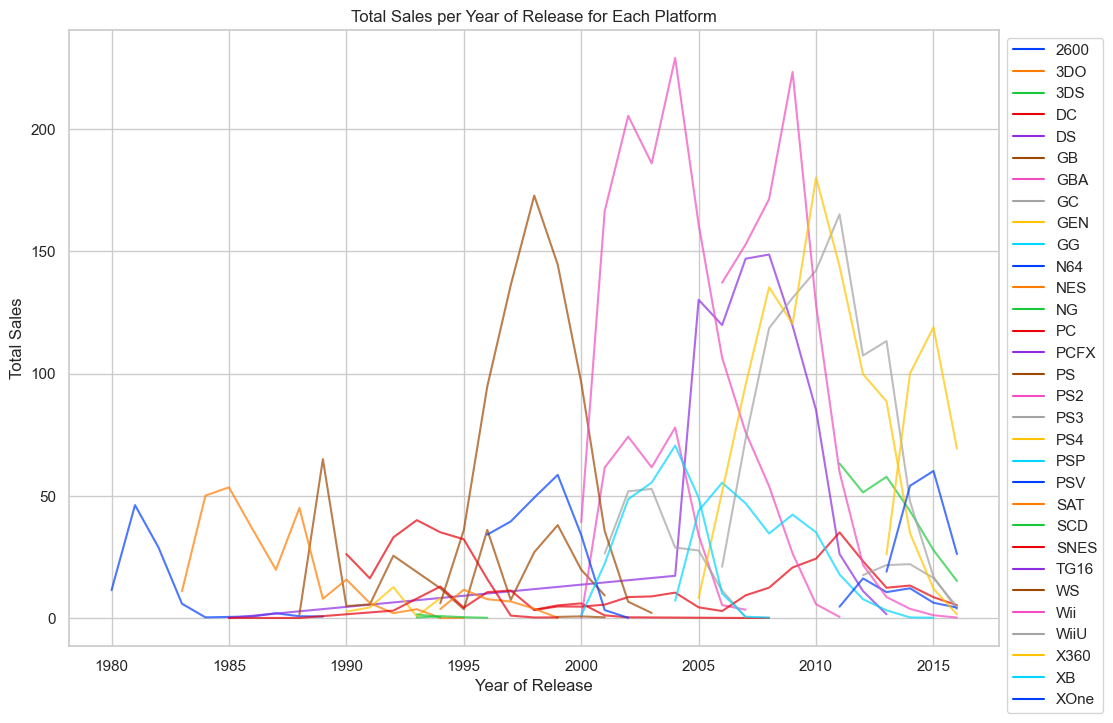

In [22]:
# Create a graph using Matplotlib and Seaborn
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot to create the graph
sns.lineplot(data=sales_year_platform, x='year_of_release', y='total_sales', 
             hue='platform', palette='bright', alpha=0.7)

# Set the title and labels
plt.title('Total Sales per Year of Release for Each Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')

# Show the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [23]:
# Visualisation is too messy. Try to break the 'sales_year_platform' df in smaller 10 year periods (1980-90, 1990-2000, 2000-2010, 2010-2016.)
# Then run the same graph for each period and compare.
# Different platforms rule different eras, so we need to see the relative peaks in the main graph to see the prevalent platforms in each period.
sales_year_platform_80_90 = sales_year_platform[(sales_year_platform['year_of_release'] >= 1980) & (sales_year_platform['year_of_release'] <= 1990)]
display(sales_year_platform_80_90.head(10))
sales_year_platform_90_00 = sales_year_platform[(sales_year_platform['year_of_release'] >= 1990) & (sales_year_platform['year_of_release'] <= 2000)]
display(sales_year_platform_90_00.head(10))
sales_year_platform_00_10 = sales_year_platform[(sales_year_platform['year_of_release'] >= 2000) & (sales_year_platform['year_of_release'] <= 2010)]
display(sales_year_platform_00_10.head(10))
sales_year_platform_10_16 = sales_year_platform[(sales_year_platform['year_of_release'] >= 2010) & (sales_year_platform['year_of_release'] <= 2016)]
display(sales_year_platform_10_16.head(10))

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,46.18
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


,platform,year_of_release,total_sales
10,3DO,1994,0.02
11,3DO,1995,0.08
18,DC,1998,3.38
19,DC,1999,5.16
20,DC,2000,5.99
38,GB,1990,4.89
39,GB,1991,5.57
40,GB,1992,25.49
41,GB,1994,12.18
42,GB,1995,3.60


,platform,year_of_release,total_sales
20,DC,2000,5.99
21,DC,2001,1.07
22,DC,2002,0.29
23,DC,2007,0.02
24,DC,2008,0.04
26,DS,2004,17.27
27,DS,2005,130.14
28,DS,2006,119.81
29,DS,2007,146.94
30,DS,2008,148.65


,platform,year_of_release,total_sales
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,57.76
15,3DS,2014,43.76
16,3DS,2015,27.78
17,3DS,2016,15.14
32,DS,2010,85.02
33,DS,2011,26.18
34,DS,2012,11.01
35,DS,2013,1.54


Sales for 1980-1990: year_of_release  platform
1980             2600        11.38
1981             2600        46.18
1982             2600        28.88
1983             2600         5.84
                 NES         10.96
1984             2600         0.27
                 NES         50.08
1985             2600         0.45
                 DS           0.02
                 NES         53.44
                 PC           0.04
1986             2600         0.67
                 NES         36.41
1987             2600         1.94
                 NES         19.76
1988             2600         0.74
                 GB           1.43
                 NES         45.01
                 PC           0.03
1989             2600         0.63
                 GB          64.97
                 NES          7.85
1990             GB           4.89
                 GEN          2.60
                 NES         15.73
                 SNES        26.15
Name: total_sales, dtype: float64


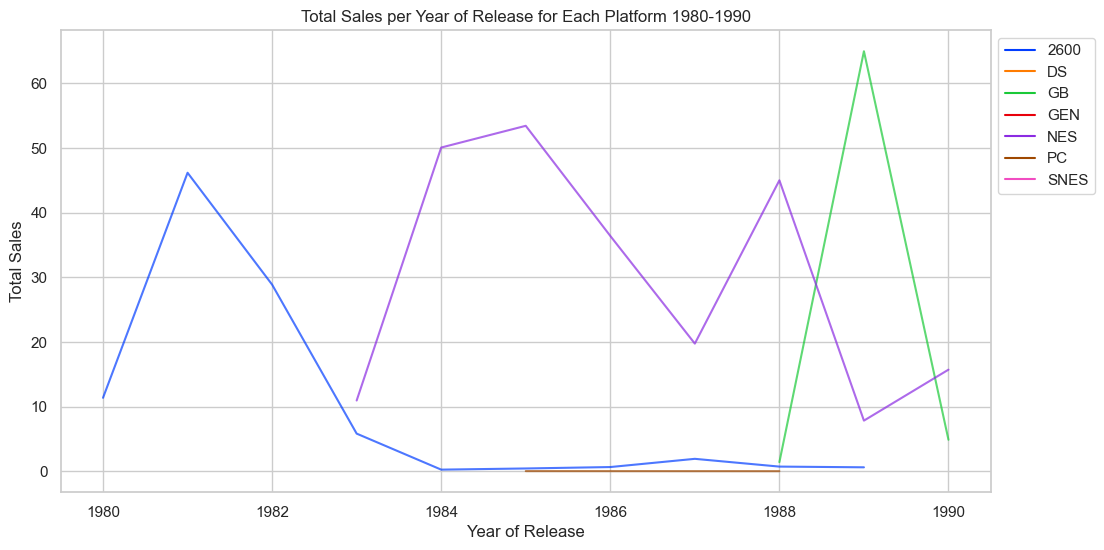

Total sales for 1980-1990: 436.35 Millions of copies sold


In [24]:
# Graph for 1980-90
print("Sales for 1980-1990:", sales_year_platform_80_90.groupby(['year_of_release', 'platform'])['total_sales'].sum())
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_year_platform_80_90, x='year_of_release', y='total_sales', 
             hue='platform', palette='bright', alpha=0.7)
plt.title('Total Sales per Year of Release for Each Platform 1980-1990')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
#print("Total sales for 1980-1990:", sales_year_platform_80_90['total_sales'].sum())
print("Total sales for 1980-1990: {:.2f}".format(sales_year_platform_80_90['total_sales'].sum()), "Millions of copies sold")


#### **The decade 1980-1990 shows the consecutive predominance of 3 platforms: 2600 (1980-1984), NES (1983-1990) and GB (1988-1990). We can draw some observations for the decade 1980-90 from this graph:**
#### • *The market periodically displays a single industry leader which supersedes all competitors for a time period of around 4 years.*<br>
#### • *Each platform sales peak after 2 years in the market (2600:1980-82, NES:1983-85), and then present a sharp decline as a new leader rises to the top. In the case of GB, it was a shorter period (1988-89). This might suggest that as the industry develops and competition ensues, the average time of platform dominance gets shorter.*
#### • *Each consecutive platform presents a new record of sales at their peak (2600:~45M, NES:~50M, GB:65M). This suggests the industry is growing as a whole.*
#### • *The NES presents a resurgence (1987-88) after its first decline (85-87). The sales during this period (~45M in 1988) are nonetheless smaller than its historic peak in 1985. At the same time, the decline of the NES coincides with the appearance and rise of the GB. This suggests that Nintendo was its own biggest competitor and virtually the single company dominating the videogame industry during this period.*

Sales for 1990-2000: year_of_release  platform
1990             GB           4.89
                 GEN          2.60
                 NES         15.73
                 SNES        26.15
1991             GB           5.57
                             ...  
2000             PC           4.66
                 PS          96.37
                 PS2         39.17
                 WS           0.68
                 XB           0.99
Name: total_sales, Length: 75, dtype: float64


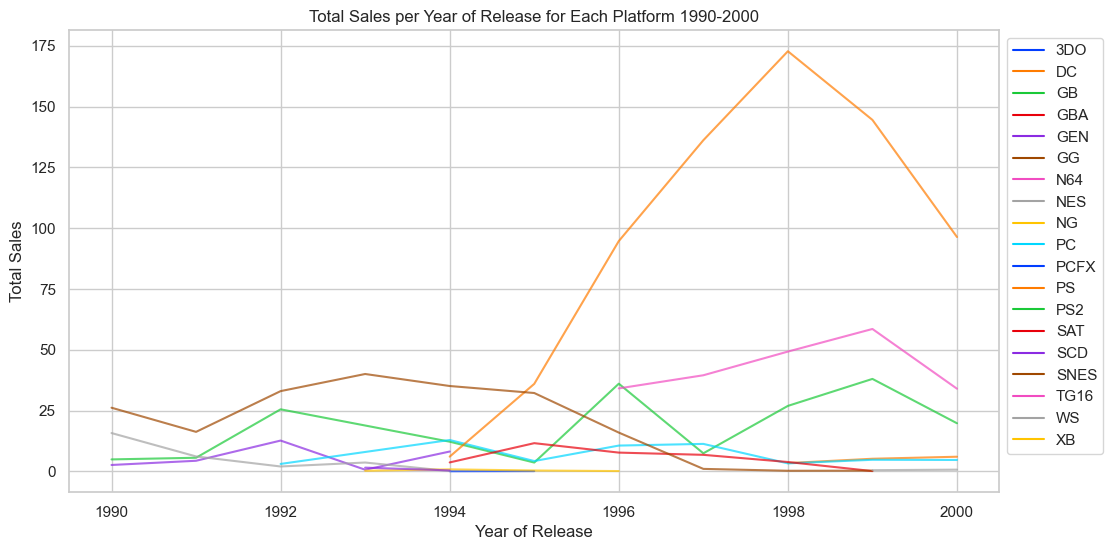

Total sales for 1990-2000: 1485.38 Millions of copies sold


In [25]:
# Graph for 1990-2000
print("Sales for 1990-2000:", sales_year_platform_90_00.groupby(['year_of_release', 'platform'])['total_sales'].sum())
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_year_platform_90_00, x='year_of_release', y='total_sales', 
             hue='platform', palette='bright', alpha=0.7)
plt.title('Total Sales per Year of Release for Each Platform 1990-2000')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Total sales for 1990-2000: {:.2f}".format(sales_year_platform_90_00['total_sales'].sum()), "Millions of copies sold")

#### **The decade 1990-2000 begins with a market split among four main competitors in the videogame industry (SNES, NES, GB and GEN):**
#### • *From 1990-1995, we see a clear dominance of the SNES, which debuted with ~26M in sales in 1990 and rose to peak sales of ~40M in 1993. The two trailing competitors are the GB (peak 1992:~25M) and the GEN (peak 1992:~13M). We also see a progressive decline of the NES, which becomes largely obsolete after 1992.*
#### • *The appearence of the PS in 1994 would mark the defining event of the decade. After becoming the leader in 1995 with ~36M in sales (vs. SNES:~32M), the PS continued its meteoric ascension which peaked at ~173M in sales in 1998, becoming by far the biggest selling platform in history at that point.*
#### • *A memorable platform of the decade is the N64. After its appearance in 1996 with sales of ~34M, it would continue its ascent until reaching sales of ~58M in 1999, becoming the second most succesful platform of the decade, albeit by a long stretch.*
#### • *Finally, it is worth noting the succesive revivals of the GB during the 90s (1992, 1996, 1999). Altought it would never again reach the heights it atained in its best year of 1989, the GB proved to be one of the most succesful platforms of the 90s, placing at a consistent 3rd place during most of the decade. It would also become the longest running platform at that point (1988-2000)*

Sales for 2000-2010: year_of_release  platform
2000             DC            5.99
                 GB           19.76
                 GBA           0.07
                 N64          33.97
                 PC            4.66
                              ...  
2010             PS2           5.64
                 PS3         142.17
                 PSP          35.04
                 Wii         127.95
                 X360        180.15
Name: total_sales, Length: 92, dtype: float64


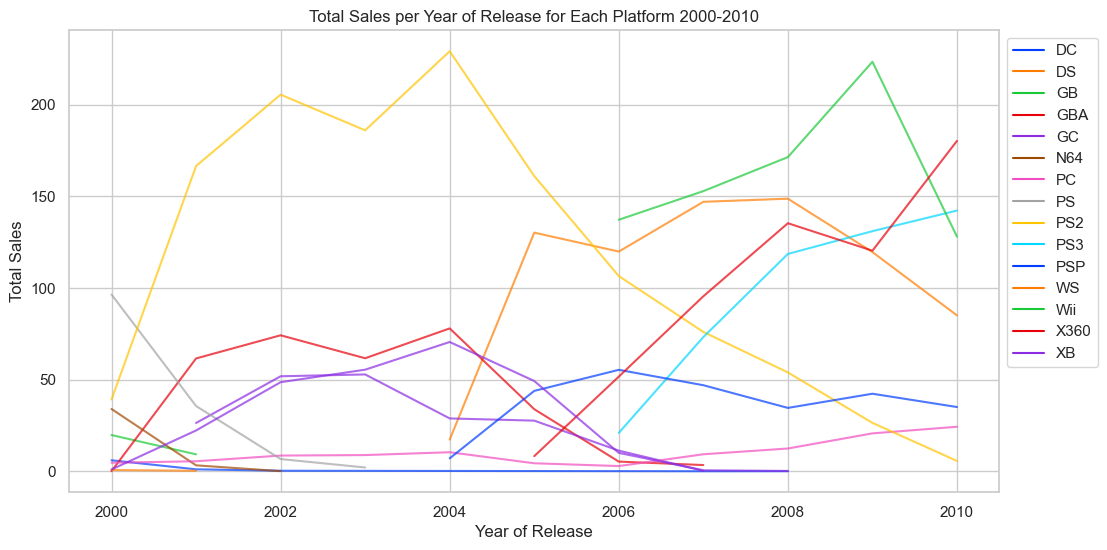

Total sales for 2000-2010: 5278.67 Millions of copies sold


In [26]:
# Graph for 2000-2010
print("Sales for 2000-2010:", sales_year_platform_00_10.groupby(['year_of_release', 'platform'])['total_sales'].sum())
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_year_platform_00_10, x='year_of_release', y='total_sales', 
             hue='platform', palette='bright', alpha=0.7)
plt.title('Total Sales per Year of Release for Each Platform 2000-2010')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Total sales for 2000-2010: {:.2f}".format(sales_year_platform_00_10['total_sales'].sum()), "Millions of copies sold")

#### **Things become much more complex for the period 2000-2010, especially during the second half of the decade:**
#### • *The year 2000 begins with the launching of the PS2, the platform that would dominate the market for the next six years. Just like its predecessor, PS1 (which fades away by the year 2003), the PS2 takes the industry by storm and rises from modest sales in 2000 (~39M), up to a new yearly record in sales for any platform in history (2004:~229M). After this point the sales begin to rapidly decline year over year until practically dissapearing by the end of the decade (2010:~6M).*
#### • *Three other platforms are worth mentioning during the first half of the decade: GBA, GC and XB. Althought still a far cry away from the PS2, these three platforms have comparable sales and it could be said they dispute the second place from 2000-2006, with the GBA slight rising as the leader with peak sales of ~78M in 2004. An interesting fact is that Nintendo's two contenders, the GBA and GC, were portable platforms, whereas the Xbox by Microsoft was a conventional home console.*
#### • *The tables at last turned, beggining in 2004 with the appearance of the next generation of platforms. Nintendo's DS and Wii would become the market leaders from 2006-2009. The Wii, in particular, has a short but intense reign, having one of the biggest debuts in history (2006:~137M) and peaking in 2009 with ~223M in sales. On the other hand, the X360 and the PS3, appearing in 2005 and 2006 respectively, had a slower start but they both end up surpassing Wii's sales by the end of the decade (2010- Wii:~128M, PS3:~142M, X360:~180M), to become the new leaders of the videogame industry.*

Sales for 2010-2016: year_of_release  platform
2010             DS           85.02
                 PC           24.28
                 PS2           5.64
                 PS3         142.17
                 PSP          35.04
                              ...  
2016             PSV           4.25
                 Wii           0.18
                 WiiU          4.60
                 X360          1.52
                 XOne         26.15
Name: total_sales, Length: 65, dtype: float64


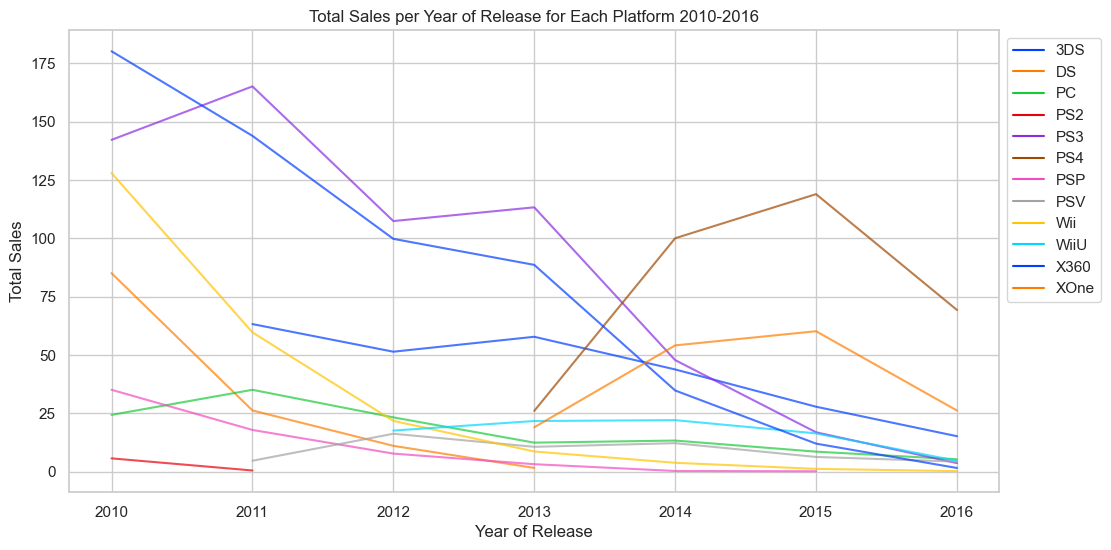

Total sales for 2010-2016: 2564.17 Millions of copies sold


In [27]:
# Graph for 2010-2016
print("Sales for 2010-2016:", sales_year_platform_10_16.groupby(['year_of_release', 'platform'])['total_sales'].sum())
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_year_platform_10_16, x='year_of_release', y='total_sales', 
             hue='platform', palette='bright', alpha=0.7)
plt.title('Total Sales per Year of Release for Each Platform 2010-2016')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
print("Total sales for 2010-2016: {:.2f}".format(sales_year_platform_10_16['total_sales'].sum()), "Millions of copies sold")

#### **For the period 2010-2016 we see a gradual contraction of the market:
#### • *The year 2010 begins with strong sales by the two market leaders (X360:~180M, PS3:~142M), followed closely by the Wii (~128M), which will start its decline after this point. The following years are characterised by a general decline in sales, which will continue year over year begining in 2012 (likely due to the effects of the Great Recession and 2012 Financial Crisis). By 2016, the total industry sales are ~130M, barely 20% of the all time high (2009:~683M).*
#### • *We can see this great decline in the competition between the next generation consoles (2013-2016). Even in their best year (2015- PS4:~118M, XOne:~60M), their total sales are well below the records attained by their predecessors in the early aughts.*


In [28]:
# Make a graph of the total sales per year (Industry Volume)
total_sales_year = sales_year_platform.groupby('year_of_release')['total_sales'].sum().reset_index()
print(total_sales_year)
fig = px.bar(total_sales_year, x='year_of_release', y='total_sales', title='Total Sales per Year (Industry Volume)')
fig.update_traces(marker_color='green', marker_line_color='black', marker_line_width=2)
fig.update_xaxes(title_text='Year', tickangle=45, tickfont=dict(size=14))
fig.update_yaxes(title_text='Total Sales', title_font=dict(size=16))
fig.update_layout(
    title_font=dict(size=24),
    title_x=0.5,
    barmode='group',
    bargap=0.2
)
fig.show()

    year_of_release  total_sales
0              1980        11.38
1              1981        46.18
2              1982        28.88
3              1983        16.80
4              1984        50.35
5              1985        53.95
6              1986        37.08
7              1987        21.70
8              1988        47.21
9              1989        73.45
10             1990        49.37
11             1991        32.23
12             1992        76.16
13             1993        45.99
14             1994        79.23
15             1995        88.12
16             1996       199.15
17             1997       202.10
18             1998       259.59
19             1999       251.78
20             2000       201.66
21             2001       331.46
22             2002       395.55
23             2003       366.69
24             2004       440.99
25             2005       458.29
26             2006       520.75
27             2007       604.76
28             2008       674.85
29        

### **Based on the trend, we can predict that the Sales for 2017 will continue to decline or stay around the same levels as 2016, at best. Based on the data on a year-to-year basis, there are no indicators to suggest that the videogame industry will ever recover or experience the sustained growth attained during the period 1995-2009.*

In [29]:
# Create a box plot for the global sales of all games, broken down by platform.
sns.set(style="darkgrid")
plt.figure(figsize=(18, 6))  # Optional: Adjust the figure size
custom_palette = sns.color_palette("Set3")  # You can choose a different palette
sns.boxplot(x='platform', y='total_sales', data=sales_year_platform, notch=True, palette=custom_palette)
plt.title('Box Plot of Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')  # Adjust the y-axis label if needed
plt.show()


### *The Boxplot shows that the most successful platforms in history are the PS2 and the Wii with sales of +250M in their best years. The next platforms with the highest average sales in descending order are the PS3, PS2, PS4 and PS, thus making Sony the most succesful company in the history of videogames. Some of the best selling platforms also include XBox360 and DS. The classic 'golden age' home consoles such as the NES, SNES, GB and N64 have rather modest records sales in comparison. This is due to the smaller global size of the videogame industry during their generation. As the analysis shows, the market explotion for videogames began with the PS in 1994 and presented sustained growth which benefited all competitors until circa the year 2010, when the industry started dwindling.*

In [ ]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
# Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
# We can compare reviews/sales to see how user and professional reviews affect sales for one popular platform (PS2)
# Create a variable for Games released on PS2
games_ps2 = games[games['platform']=='PS2']
games_ps2.head(5)
# Plot a plotly.express scatterplot with 2 numerical variables.
# Critic Score / Total Sales
fig = px.scatter(games_ps2, x='critic_score', y='total_sales')
fig.update_traces(marker=dict(size=3, opacity=0.3, line=dict(width=6, color='blue')))
fig.update_layout(title='Scatterplot Critic Score / Total Sales PS2', xaxis_title='Critic Score', yaxis_title='Total Sales')
fig.update_xaxes(categoryorder='category ascending')
fig.show()
# User Score / Total Sales
fig = px.scatter(games_ps2, x='user_score', y='total_sales')
fig.update_traces(marker=dict(size=3, opacity=0.3, line=dict(width=6, color='blue')))
fig.update_layout(title='Scatterplot User Score / Total Sales PS2', xaxis_title='User Score', yaxis_title='Total Sales')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

### *For both Critic and User Score, there seems to be a positive correlation between a higher score and total sales. In general, we only find games with sales of ~5M to have a critic score >= 60 and user score >= 6.4. The frequency increases towards higher sales as scores go up. Although this correation becomes weaker above the ~10M range, because there are only a handful of outliers that reached this level of sales. Interestingly, the best selling games of PS2 are not the ones with the highest scores. This means that there are other factors besides 'critic/user score' that influence the success and popularity of a title* 

In [ ]:
# Display the top 15 for PS2 by total_sales critic_score and user_score:
print("Top 15 Total Sales games PS2:")
display(games_ps2.sort_values(by='total_sales', ascending=False)[['name', 'critic_score', 'user_score', 'total_sales']].head(15))
print("Top 15 highest Critic Score games PS2:")
display(games_ps2.sort_values(by='critic_score', ascending=False)[['name', 'critic_score', 'user_score', 'total_sales']].head(15))
print("Top 15 highest User Score games PS2:")
display(games_ps2.sort_values(by='user_score', ascending=False)[['name', 'critic_score', 'user_score', 'total_sales']].head(15))

### *In the case of the best selling games, it's reasonable to find a correlation with some of the highest critic scores (i.e Grand Theft Auto: San Andreas)There are also games that, in spite of having a high critic score, were not able to attain record sales (i.e. Resident Evil 4). On the other hand, it seems odd that the highest user score games have very low critic scores and total sales. This is normally not the case, so we can speculate that the user_score data is not reliable for these games or there are some special cirmcunstances that need to be considered. (i.e Okami: "Ōkami was one of the last PlayStation 2 games released prior to the release of the PlayStation 3. Although it suffered from poor sales, the game received critical acclaim, earning IGN's 2006 Game of the Year." - Wikipedia). We must take this into account if we decide to work with these titles, because we might need to make revisions to the dataframe.*

In [ ]:
# We can graph a global scatterplot of the relation between Scores/Sales to see if this correlation represents a general tendency.
# Plot a plotly.express scatterplot with 2 numerical variables.
# Critic Score / Total Sales
fig = px.scatter(games, x='critic_score', y='total_sales')
fig.update_traces(marker=dict(size=3, opacity=0.3, line=dict(width=6, color='blue')))
fig.update_layout(title='Scatterplot Critic Score / Total Sales Global', xaxis_title='Critic Score', yaxis_title='Total Sales')
fig.update_xaxes(categoryorder='category ascending')
fig.show()
# User Score / Total Sales
fig = px.scatter(games, x='user_score', y='total_sales')
fig.update_traces(marker=dict(size=3, opacity=0.3, line=dict(width=6, color='blue')))
fig.update_layout(title='Scatterplot User Score / Total Sales Global', xaxis_title='User Score', yaxis_title='Total Sales')
fig.update_xaxes(categoryorder='category ascending')
fig.show()
# Display the top 15 for PS by total_sales critic_score and user_score:
print("Top 15 Total Sales games Global:")
display(games.sort_values(by='total_sales', ascending=False)[['name', 'critic_score', 'user_score', 'total_sales', 'platform']].head(15))
print("Top 15 highest Critic Score games Global:")
display(games.sort_values(by='critic_score', ascending=False)[['name', 'critic_score', 'user_score', 'total_sales', 'platform']].head(15))
print("Top 15 highest User Score games Global:")
display(games.sort_values(by='user_score', ascending=False)[['name', 'critic_score', 'user_score', 'total_sales', 'platform']].head(15))

### *A global analysis shows that, even thought there is still a slight correlation between Critic/User scores and Total Sales, this is not the case at all for the highest selling games of all times. The top 15 best selling games of all times are all outliers, which happen to be Nintendo games with average to mediocre critic/user scores. This might be due to the fact that Nintendo flagship titles are usually tied up to the purchase of the platform, so they end up being the most widespread games in that platform. The most relevant example is Wii Sports, the flagship title of the Wii, which is also the highest selling game of all times by a wide margin.*
### *In the case of Global Critic Scores, we see that games with the highest scores tend to be strong titles and some of the best sellers in any platform. On the contrary, the Global User Score presents us a very different escenario: Games with the highest user scores have almost always had very low sales. In many cases (i.e Breath of Fire III, Harvest Moon), it seems these scores have been attained retrospectively due to a small but very dedicated fan base that have elevated these games to the status of cult classics.*
### *Note: We see on the scatterplots that the 'critic_score'=70 and 'user_score'=7.5 have the highest frequency of titles. This is because at the beggining of the analysis we filled the missing values (Nan, tbd) with the median scores in each case. This recurrence doesn't affect our analysis or conclusions.*

In [ ]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.
# We must create a dataframe which contains only games which appeared in two or more platforms.
# We start by slicing the 'games' df, included only repeated values in the 'name' column.
# Get a boolean mask indicating duplicated rows based on the 'name' column
mask_duplicates = games['name'].duplicated(keep=False)
# Slice the DataFrame using the boolean mask
games_multi = games[mask_duplicates]
# Display the resulting DataFrame
display(games_multi)

In [ ]:
# Find games that had the most releases in different platforms
display(games_multi['name'].value_counts().head(20))
# Find the highest selling games which were released in at least two platforms
display(games_multi.sort_values(by='total_sales', ascending=False).head(20))

In [ ]:
# Create a function to display the rows with the same 'name', this will give us the releases in different platforms.
def display_game_info(df, game_name):
    display(df[df['name'] == game_name])

# Display info for some games and pick the ones we can use to compare.
display_game_info(games_multi, 'Need for Speed: Most Wanted')
display_game_info(games_multi, 'Ratatouille')
display_game_info(games_multi, 'FIFA 14')
display_game_info(games_multi, 'The LEGO Movie Videogame')
display_game_info(games_multi, 'FIFA 12')
display_game_info(games_multi, 'Spider-Man 3')
display_game_info(games_multi, 'Grand Theft Auto V')
display_game_info(games_multi, 'Call of Duty: Modern Warfare 3')
display_game_info(games_multi, 'Call of Duty: Ghosts')

In [ ]:
# For uniformity, we will use games that were released across several platforms during the same year.
# For diversity, we'll use: 'Ratatouille', 'FIFA 14', 'Spider-Man 3', 'Grand Theft Auto V' and 'Call of Duty: Ghosts'
# since each game belongs to a different genre and was released in a different year.
# this will give us a diverse sample to compare titles at different timeframes in the videograme industry.
ratatouille = games[games['name']=='Ratatouille']
fifa_14 = games[games['name']=='FIFA 14']
spiderman_3 = games[games['name']=='Spider-Man 3']
gta_v = games[games['name']=='Grand Theft Auto V']
cod_g = games[games['name']=='Call of Duty: Ghosts']

# Using Seaborn, plot a bar graph for each game showing total sales across all platforms.
# 1) Ratatouille
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
sns.barplot(data=ratatouille, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.title('Ratatouille (2007) Total Sales with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(ratatouille)

# 2) FIFA 14
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
sns.barplot(data=fifa_14, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.title('FIFA 14 (2013) Total Sales with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(fifa_14)

# 3) Spider-Man 3
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
sns.barplot(data=spiderman_3, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.title('Spider-man 3 (2007) Total Sales with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(spiderman_3)

# 4) Grand Theft Auto V
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
sns.barplot(data=gta_v, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.title('Grand Theft Auto V (2013-15) Total Sales with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(gta_v)

# 5) Call of Duty: Ghosts
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
sns.barplot(data=cod_g, x='name', y='total_sales', hue='platform')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.title('Call of Duty: Ghosts (2013) Total Sales with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(cod_g)

### 

### *We can see that, in general, games with multi-platform releases tend to sell more on their PS2, PS3 and X360 versions. However, the results are very variable, since the sales per platform also depend on the genre and the year of release. For example, in the case of Ratatouille (Action, 2007), it had its highest sales on the DS.*

### *To better find the popularity of platforms over time, we can create graphs for multi-platforms titles released in each decade.*

In [ ]:
# Graph the same bar plots for multi-platform titles sales per decade, with sales of at least 1 Million
# Multi-platform Games with at least 1 Million sales 1980-1990
games_multi_80_90 = games_multi[(games_multi['year_of_release']>=1980)&(games_multi['year_of_release']<=1990)]
games_multi_80_90 = games_multi_80_90[games_multi_80_90['total_sales']>=1]

# Build Seaborn barplot with x='platform', y='total_sales'
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.barplot(data=games_multi_80_90, x='name', y='total_sales', hue='platform', linewidth=0.3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('1980-1990 Total Sales per Title with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(games_multi_80_90)

In [ ]:
# For visualization purposes we can set a higher sales threshold for 1990-2000, since the market has grown.
# Multi-platform Games with at least 2.5 Million sales 1990-2000.
games_multi_90_00 = games_multi[(games_multi['year_of_release']>=1990)&(games_multi['year_of_release']<=2000)]
games_multi_90_00 = games_multi_90_00[games_multi_90_00['total_sales']>=2.5]
# Build Seaborn barplot with x='platform', y='total_sales'
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed
sns.barplot(data=games_multi_90_00, x='name', y='total_sales', hue='platform', linewidth=0.1)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('1990-2000 Total Sales per Title with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(games_multi_90_00)

### *During the first two decades of the video game industry we see that titles were exclusive to each platform, or were only available for platforms within the same company (i.e. Tetris for NES and GB). Thus, we see that in the decade of 1990-2000 each platform has some representative titles among their best selling games (SNES=Super Mario World, PS= Metal Gear Solid, GEN= Sonic the Hedgehog). The availability of multi-platform titles would only appear in the following years with the next generation of platforms.*


In [ ]:
# Multi-platform Games with at least 5 Million sales 2000-2010.
games_multi_00_10 = games_multi[(games_multi['year_of_release']>=2000)&(games_multi['year_of_release']<=2010)]
games_multi_00_10 = games_multi_00_10[games_multi_00_10['total_sales']>=5]
# Build Seaborn barplot with x='platform', y='total_sales'
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
sns.barplot(data=games_multi_00_10, x='name', y='total_sales', hue='platform', linewidth=0.3)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('2000-2010 Total Sales per Title with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(games_multi_00_10)

In [ ]:
# Multi-platform Games with at least 5 Million sales 2010-2016.
games_multi_10_16 = games_multi[(games_multi['year_of_release']>=2010)&(games_multi['year_of_release']<=2016)]
games_multi_10_16 = games_multi_10_16[games_multi_10_16['total_sales']>=5]
# Build Seaborn barplot with x='platform', y='total_sales'
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
sns.barplot(data=games_multi_10_16, x='name', y='total_sales', hue='platform', linewidth=0.4)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('2010-2016 Total Sales per Title with Platform Comparison')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
display(games_multi_10_16)

### *The 2000-2016 period is characterized by the dominance of the PS2, PS3, PS4 and X360 platforms, which also normalized the appearance of titles across multiple platforms. In the case of Wii, which had a relatively short period of market dominance (2006-2009), this may had been related to Nintendo's insistence on maintaining exclusivity of its titles only for its own platforms.*

### *We can do a deeper analysis for the series, 'Call of Duty' and 'Grand Theft Auto', since they are perhaps the most representative titles of the 2000-2016 period. By comparing the sales of the two series across various platforms, we can see the trends in platform preference over time.*

In [ ]:
# The 'Call of Duty' and 'Grand Theft Auto' series include some of the best selling videogames of all times. 
# Filter 'Call of Duty' and 'Grand Theft Auto' titles that appeared in multiple platforms:
def filter_by_keyword(df, keyword):
    return df[df['name'].str.contains(keyword, case=False, na=False)]

call_of_duty_df = filter_by_keyword(games_multi, 'Call of Duty')
print("Call of Duty titles ports to platforms:\n", call_of_duty_df['name'].value_counts())
print()
grand_theft_auto_df = filter_by_keyword(games_multi, 'Grand Theft Auto')
print("Grand Theft Auto titles ports to platforms:\n", grand_theft_auto_df['name'].value_counts())

In [ ]:
# 'Call of Duty' Series:
# Total Sales by Title by Platform
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=call_of_duty_df, x='platform', y='total_sales', hue='name', linewidth=0.4)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Call of Duty Series Total Sales by Title by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions of copies)')
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
# Total Sales by Platform by Year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=call_of_duty_df, x='year_of_release', y='total_sales', hue='platform', linewidth=0.4)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Call of Duty Series Total Sales by Platform by Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
# All 'Call of Duty' series releases by year
display(games[games['name'].str.contains('Call of Duty')].sort_values('year_of_release'))

### *In the case of the 'Call of Duty' series, we see that almost all titles had releases and higher sales on the X360 and PS3 platforms, followed by sales on PS4 and XOne. The series became a major success for X360 and PS3 starting in 2007 and experienced steady growth until 2012. After a few years of reduced sales (2013-2014), the series had its biggest sales success for the PS4 in 2015, only to drop substantially the following year 2016.*

In [ ]:
# 'Grand Theft Auto' Series:
# Total Sales by Title by Platform
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=grand_theft_auto_df, x='platform', y='total_sales', hue='name', linewidth=0.4)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Grand Theft Auto Series Total Sales by Title by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions of copies)')
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
# Total Sales by Platform by Year
plt.figure(figsize=(16, 6))  # Adjust the figure size as needed
sns.barplot(data=grand_theft_auto_df, x='year_of_release', y='total_sales', hue='platform', linewidth=0.4)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Grand Theft Auto Series Total Sales by Platform by Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()
# All 'Grand Theft Auto' series releases by year
display(games[games['name'].str.contains('Grand Theft Auto')].sort_values('year_of_release'))

### *In the case of the 'Grand Theft Auto' series, we see that it had the most releases and sales for the PS2, followed by PS3, X360 and PS4. The series had very successful titles for the PS2 in 2001, 2002 and 2004, and then moderate success in various platforms during the period 2005-2000. The biggest year in sales was 2013 for the PS3 and X360.*

In [ ]:
# Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 
# Can you generalize about genres with high and low sales?

# To calculate the most profitable genres, we can calculate the mean and median of each genre:
# Find unique values in the 'genre' column
print(games['genre'].unique())
# List of genres
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']

# Find mean and median values for each genre
# Function to calculate values
def find_values(games, genre_list):
    for genre in genre_list:
        genre_data = games[games['genre'] == genre]
        print(f"{genre} median:", genre_data['total_sales'].median())
        display(genre_data['total_sales'].describe())

find_values(games, genres)

### *The most profitable genres are 'Platform' (mean:0.93 , median:0.27 ) and 'Shooter': (mean:0.79 , median:0.24)*

In [ ]:
# Plot a histogram to compare both genres
# Create 2 variables for 'platform' and 'shooter' genres:
platform = games[games['genre']=='Platform']
shooter = games[games['genre']=='Shooter']

# Plot histograms on seaborn and value counts to find the frequency of sales
# Platform  
plt.figure(figsize=(8, 4))
sns.histplot(data=platform, x='total_sales', bins=100, kde=True, color='blue')
plt.title('Histogram of Total Sales for Platform genre 1980-2016')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()
print(platform['total_sales'].value_counts())
# Shooter
plt.figure(figsize=(8, 4))
sns.histplot(data=shooter, x='total_sales', bins=100, kde=True, color='red')
plt.title('Histogram of Total Sales for Shooter genre 1980-2016')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()
print(shooter['total_sales'].value_counts())

### *The vast majority of games in the Platform and Shooter genres (and probably all others as well) have very low sales in the range of <=0.1M (100,000 copies). For purposes of the analysis, we will consider only games that sell at least 1 Million copies.*

In [ ]:
# Create variables for Platform and Shooter games with sales of at least 1M
platform_hi = platform[platform['total_sales']>=1]
shooter_hi = shooter[shooter['total_sales']>=1]
# Plot histograms
# Platform  
plt.figure(figsize=(8, 4))
sns.histplot(data=platform_hi, x='total_sales', bins=100, kde=True, color='blue')
plt.title('Histogram of Total Sales for Platform genre hits 1980-2016')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()
print(platform_hi['total_sales'].value_counts())
# Shooter
plt.figure(figsize=(8, 4))
sns.histplot(data=shooter_hi, x='total_sales', bins=100, kde=True, color='red')
plt.title('Histogram of Total Sales for Shooter genre hits 1980-2016')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()
print(shooter_hi['total_sales'].value_counts())

### *Both genres also present a similar distribution for high selling games (>= 1 million): The vast majority is located closer to the lower levels, and only a handful of games manage to sell over 5 Million copies. We can conclude that these genres present a negative exponential distribution for low and high selling games. This means that, in general, very few games are really succesful and the ones that become mega-hits are always outliers.*

In [ ]:
#Step 4. Create a user profile for each region
# For each region (NA, EU, JP), determine:
# The top five platforms. Describe variations in their market shares from region to region.
# The top five genres. Explain the difference.
# Do ESRB ratings affect sales in individual regions?

# Create dataframes with the 1000 best sellers by region:
games_na = games.sort_values(by='na_sales', ascending=False).head(1000)
display(games_na)
games_eu = games.sort_values(by='eu_sales', ascending=False).head(1000)
display(games_eu)
games_jp = games.sort_values(by='jp_sales', ascending=False).head(1000)
display(games_jp)

In [ ]:
# The top popular five platforms.
# Do value counts of the 'platform' column for each regional df
print("Top 5 platforms NA:\n", games_na['platform'].value_counts().head(5))
print("Top 5 platforms EU:\n", games_eu['platform'].value_counts().head(5))
print("Top 5 platforms JP:\n", games_jp['platform'].value_counts().head(5))

### *North America and Europe have comparable preferences, since we see the same top 5 platforms in both regions (PS, PS2, X360, Wii, PS3). The main difference is that the X360 was more popular in NA, whereas the PS3 was more popular in EU. Japan, on the other hand, shows a very different situation. The best selling platforms are from the 1990-2000 period (PS, PS2, SNES, DS, NES). 2000-2016 platforms such as the PS3, X360 and Wii were never popular in Japan. It could be the case that the popularity of videogames reached it's highest point in Japan earlier in the 2000s, whereas it continued developing for another decade in NA and EU.*

In [ ]:
# Create variables to include only games from the top 5 platforms
games_na_top5 = games_na[games_na['platform'].isin(['PS2', 'X360', 'PS', 'Wii', 'PS3'])]
games_eu_top5 = games_eu[games_eu['platform'].isin(['PS2', 'X360', 'PS', 'Wii', 'PS3'])]
games_jp_top5 = games_jp[games_jp['platform'].isin(['PS2', 'SNES', 'PS', 'NES', 'DS'])]

# Seaborn barplot: Total Sales by Year by Platform
# North America
plt.figure(figsize=(14, 3)) 
sns.barplot(data=games_na_top5, x='year_of_release', y='total_sales', hue='platform', linewidth=0.4, errorbar=None)
plt.xticks(rotation=45) 
plt.title('1000 best sellers North America. Total Sales by Platform by Year')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions of copies)')
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Europe
plt.figure(figsize=(14, 3))
sns.barplot(data=games_eu_top5, x='year_of_release', y='total_sales', hue='platform', linewidth=0.4, errorbar=None)
plt.xticks(rotation=45)
plt.title('1000 best sellers Europe. Total Sales by Platform by Year')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions of copies)')
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# Japan
plt.figure(figsize=(14, 3))
sns.barplot(data=games_jp_top5, x='year_of_release', y='total_sales', hue='platform', linewidth=0.4, errorbar=None)
plt.xticks(rotation=45)
plt.title('1000 best sellers Japan. Total Sales by Platform by Year')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions of copies)')
plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### *We have a similar situation in North America and Europe: from 1994 to 2005 we see a market dominance of the PS, followed by the PS2. In 2006, we see an unprecedented phenomenon in sales with the Wii, and from then on, a sustained competition between the Wii, PS3 and X360. Japan shows a completely different escenario: We see that each console has a sustained period of almost exclusive market dominance, starting with the NES (1983-90), SNES (1990-95), PS (1996-2000), PS2 (2001-2003) and DS (2005-12). The SNES is the most popular platform of all times in Japan.*
### *In conclusion, the highest popularity of videogames in NA and EU spanned the years 1994-2015, whereas in Japan, we find the best selling titles in an earlier period (1983-2012).*

In [ ]:
# The top five genres. Explain the difference.
# Do value counts of the 'genre' column for each regional df
print("Top 5 platforms NA:\n", games_na['genre'].value_counts().head(5))
print("Top 5 platforms EU:\n", games_eu['genre'].value_counts().head(5))
print("Top 5 platforms JP:\n", games_jp['genre'].value_counts().head(5))


In [ ]:
# Create variables to include only games from the top 5 genres
games_na_genre = games_na[games_na['genre'].isin(['Action', 'Shooter', 'Sports', 'Platform', 'Misc'])]
games_eu_genre = games_eu[games_eu['genre'].isin(['Action', 'Shooter', 'Sports', 'Platform', 'Racing'])]
games_jp_genre = games_jp[games_jp['genre'].isin(['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc'])]

# Plotly express barplots Total Sales by Year by Genre
# North America
fig = px.bar(games_na_genre, x='year_of_release', y='total_sales',
             color='genre', facet_col='genre',
             labels={'total_sales': 'Total Sales (Millions of copies)'},
             title='1000 best sellers North America. Total Sales by Genre by Year',
             facet_col_wrap=5,  # Adjust the number of columns in the facet grid as needed
             height=350,   # Adjust the height of the plot as needed
             category_orders={'genre': ['Action', 'Shooter', 'Sports', 'Platform', 'Misc']}) # Specify order of columns
fig.update_xaxes(tickangle=45)
fig.show()

# Europe
fig = px.bar(games_eu_genre, x='year_of_release', y='total_sales',
             color='genre', facet_col='genre',
             labels={'total_sales': 'Total Sales (Millions of copies)'},
             title='1000 best sellers Europe. Total Sales by Genre by Year',
             facet_col_wrap=5,  # Adjust the number of columns in the facet grid as needed
             height=350,
             category_orders={'genre': ['Action', 'Shooter', 'Sports', 'Platform', 'Racing']})
fig.update_xaxes(tickangle=45)
fig.show()

# Japan
fig = px.bar(games_jp_genre, x='year_of_release', y='total_sales',
             color='genre', facet_col='genre',
             labels={'total_sales': 'Total Sales (Millions of copies)'},
             title='1000 best sellers Japan. Total Sales by Genre by Year',
             facet_col_wrap=5,
             height=350,
             category_orders={'genre': ['Action', 'Role-Playing', 'Sports', 'Platform', 'Misc']})
fig.update_xaxes(tickangle=45)
fig.show()


### *The 'Platform' genre has been consistenly popular across all regions. The 'Sports' genre has been popular across regions as well, but became less popular in Japan after 2010. In contrast, the 'Action' and 'Shooter' genres, while being the two most popular in NA and EU, are significantly less popular in Japan. The 'Racing' genre is specifically popular in Europe and the 'Role-Playing' genre is specifically popular in Japan.*

In [ ]:
# Do ESRB ratings affect sales in individual regions?
# Create a Variable to consider only games that have an ESRB rating
games_esrb = games[games['rating'].notna()]
games_esrb

In [ ]:
# Group by rating and year to find the most popular ESRB ratings per region
# North America
games_esrb_na = games_esrb.groupby(['rating', 'year_of_release'])['na_sales'].sum().reset_index()
games_esrb_eu = games_esrb.groupby(['rating', 'year_of_release'])['eu_sales'].sum().reset_index()
games_esrb_jp = games_esrb.groupby(['rating', 'year_of_release'])['jp_sales'].sum().reset_index()

# Total Sales by Year of Release by Rating
rating_list = ['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T']
# North America
fig = px.bar(games_esrb_na, x='year_of_release', y='na_sales',
             color='rating', facet_col='rating',
             labels={'total_sales': 'Total Sales (Millions of copies)'},
             title='Total Sales per Year by ESRB Rating. North America 1988-2008',
             facet_col_wrap=4,
             height=400,
             category_orders= {'rating': rating_list})
fig.update_xaxes(tickangle=45)
fig.show()
# Europe
fig = px.bar(games_esrb_eu, x='year_of_release', y='eu_sales',
             color='rating', facet_col='rating',
             labels={'total_sales': 'Total Sales (Millions of copies)'},
             title='Total Sales per Year by ESRB Rating. Europe 1988-2008',
             facet_col_wrap=4,
             height=400,
             category_orders= {'rating': rating_list})
fig.update_xaxes(tickangle=45)
fig.show()
# Japan
fig = px.bar(games_esrb_jp, x='year_of_release', y='jp_sales',
             color='rating', facet_col='rating',
             labels={'total_sales': 'Total Sales (Millions of copies)'},
             title='Total Sales per Year by ESRB Rating. Japan 1988-2008',
             facet_col_wrap=4,
             height=400,
             category_orders= {'rating': rating_list})
fig.update_xaxes(tickangle=45)
fig.show()

### *Taking into account the different sizes of each market (NA > EU > JP), each region has a comparable distribution in sales per ESRB rating. In all cases, the rating 'E' is the most popular, although its numbers start declining earlier in Japan (2006) vs North America and Europe (2010). A remarkable finding is that the 'M' rating became the most popular in North American and Europe starting in 2010, but this increase in popularity was not reflected in Japan. This can be perhaps explained due to the conservative values in Japanese society.*

In [ ]:
# Step 5. Test the following hypotheses:
# —Average user ratings of the Xbox One and PC platforms are the same.
# Create variables that filter XBox One and PC games.
xone = games[games['platform']=='XOne']
pc = games[games['platform']=='PC']

# Test the hypotheses
# The null hypotheses H0 is that the Average user ratings of the Xbox One and PC platforms are the same.
# The alternative hypothesis H1 is that they are different.

# We use the method scipy.stats.ttest_1samp (array, popmean) 
alpha = 0.05  # critical statistical significance

# Create a variable for a series including all the user ratings for PC games
# this will be the array containing the sample
pc_user = pc['user_score']
print("User scores for PC games:\n", pc_user)
print()
# Create a variable for the mean of the user ratings for XOne games
# this will be the proposed mean (popmean) we want to test the hypothesis for
xone_user_mean = xone['user_score'].mean()
print("User score mean for XOne games:", xone_user_mean)
print()
results = st.ttest_1samp(pc_user, xone_user_mean)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.\n" 
          "The User Score means for PC and XOne games are NOT the same.")
else:
    print("We can't reject the null hypothesis.\n"
          "The User Score means for PC and XOne games could be the same.")

In [ ]:
# —Average user ratings for the Action and Sports genres are different.
# Create variables that filter Action and Sports genres.
action = games[games['genre']=='Action']
sports = games[games['genre']=='Sports']

# Test the hypotheses
# The null hypotheses H0 is that the Average user ratings for the Action and Sports genres are the same.
# The alternative hypothesis H1 is that they are different.

# We use the method scipy.stats.ttest_1samp (array, popmean) 
alpha = 0.05  # critical statistical significance

# Create a variable for a series including all the user ratings for Sports games
# this will be the array containing the sample
sports_user = sports['user_score']
print("User scores for Sports games:\n", sports_user)
print()
# Create a variable for the mean of the user ratings for Action games
# this will be the proposed mean (popmean) we want to test the hypothesis for
action_user_mean = action['user_score'].mean()
print("User score mean for Action games:", action_user_mean)
print()
results = st.ttest_1samp(sports_user, action_user_mean)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.\n" 
          "The User Score means for Action and Sports games are NOT the same.")
else:
    print("We can't reject the null hypothesis.\n"
          "The User Score means for Action and Sports games could be the same.")

In [ ]:
#Explain:
#—How you formulated the null and alternative hypotheses
#—What significance level you chose to test the hypotheses, and why.

#### *In both cases to formulate the null hypothesis (HO) we assume there is no difference between the population means. The Alternative hypothesis (H1) is, on the contrary, that there is such a difference. This is always the format of testing a hypothesis with the p-value method.*
#### *This is why on the first scenario ("Average user ratings of the Xbox One and PC platforms are the same"), we took this statement as the H0 null hypothesis, and formulated the alternative H1 (""Average user ratings of the Xbox One and PC platforms are different").*
#### *On the other hand, in the second escenario ("Average user ratings for the Action and Sports genres are different"), we needed to take this as the H1 alternative hypothesis, and we formulated the null H0 ("Average user ratings for the Action and Sports genres the same")*
#### *We chose the significance level 5% (alpha=0.05) which is the most common threshold and corresponds to a 5% risk of incorrectly rejecting the null hypothesis. In other words, we are willing to accept up to a 5% risk of rejecting the null hypothesis and affirm that the means are not the same for any given sample of the array. In the first scenario (Xone vs PC) the p-value=5.3157145107912936e-17 or ~0.0000000000000531% probability of the means being the same. So we can confidently reject the null hypothesis and affirm that the means will not be the same for any given sample we take from the array. In the second scenario (Action vs. Sports) the p-value=0.6430330314617905 or ~64% probability of the means being the same. So we cannot reject the null hypothesis and we need to assume there is a high probability of the means being the same for any given sample we take from the array.*

## **GENERAL CONCLUSION**
#### *The present analysis has been conducted on a dataframe of [16715 rows x 11 columns], containing data of videogames released for various platforms, in three different global regions, spanning the years 1980-2016. We first organized, cleaned the data, and filled the missing values. We then conducted several analysis with different slices of the dataframe, using graphs generated with Matplotlib, Seaborn and Plotly.Express.*
#### *The analysis revealed that the videogame industry experienced slow and sustained growth during the 1980's, gained popularity during the 1990's, reached its maximum development during the first decade of the 2000s, and then started declining gradually in the period 2010-2016. The analysis also showed differences in the global markets, which differ in volume of sales (NA > EU > JP) and platform/genre preferences. The North American and European markets were shown to be similar in general terms. Remarkably, they both presented intense competition in the last 10 years of analysis (2006-2016) among some last generation platforms (Wii,X360,PS3). This was not the case in Japan, where the market presented brief periods of overlapping competition between two platforms, but in general, was characterized by longer periods of consecutive dominance by a single platform leader (NES - SNES - PS - PS2 - DS). The period of decline started earlier in Japan as well, circa 2012. The last generation platforms that dominated the North American and European markets during the last period were never popular in Japan.*